In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:

df_test = pd.read_csv(
    './data/quantum erasure classical no eraser/0degrees.csv',
    skiprows=5,
    delimiter=';',
    skipfooter=8,
    engine='python'  # Required for skipfooter
)

# # Convert all columns to numeric (if applicable)
# df_test = df_test.apply(pd.to_numeric, errors='coerce')

#Alternatively, convert specific columns (e.g., 'column_name')
df_test[' Power(W)'] = pd.to_numeric(df_test[' Power(W)'], errors='coerce')

print(df_test)

    Date (MM/dd/yyyy)   Time of day (hh:mm:ss.fff)   Power(W)
0            10/2/2025                14:52:43.618   0.000048
1            10/2/2025                14:52:43.624   0.000048
2            10/2/2025                14:52:43.630   0.000049
3            10/2/2025                14:52:43.636   0.000049
4            10/2/2025                14:52:43.642   0.000049
..                 ...                         ...        ...
851          10/2/2025                14:52:53.567   0.000046
852          10/2/2025                14:52:53.574   0.000045
853          10/2/2025                14:52:53.579   0.000041
854          10/2/2025                14:52:53.587   0.000040
855          10/2/2025                14:52:53.617   0.000040

[856 rows x 3 columns]


In [3]:
df_test

,Date (MM/dd/yyyy),Time of day (hh:mm:ss.fff),Power(W)
0,10/2/2025,14:52:43.618,0.000048
1,10/2/2025,14:52:43.624,0.000048
2,10/2/2025,14:52:43.630,0.000049
3,10/2/2025,14:52:43.636,0.000049
4,10/2/2025,14:52:43.642,0.000049
...,...,...,...
851,10/2/2025,14:52:53.567,0.000046
852,10/2/2025,14:52:53.574,0.000045
853,10/2/2025,14:52:53.579,0.000041
854,10/2/2025,14:52:53.587,0.000040


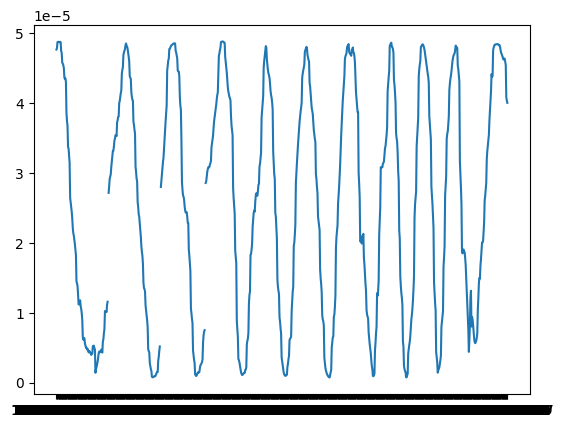

In [4]:
plt.plot(df_test[' Time of day (hh:mm:ss.fff)'], df_test[' Power(W)'])


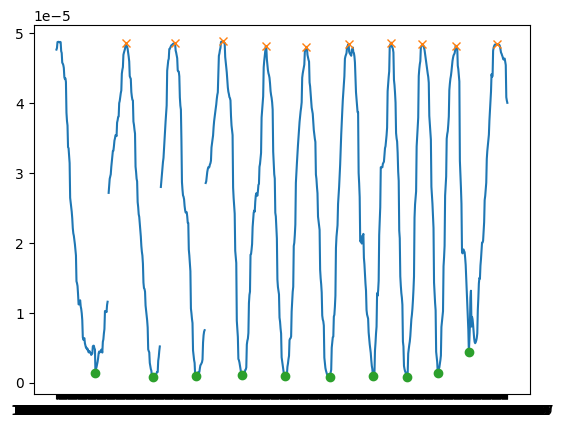

In [5]:
i = signal.find_peaks(df_test[' Power(W)'], distance = 43,  prominence=0.2e-5)
j = signal.find_peaks(-df_test[' Power(W)'], distance = 42,  prominence=0.2e-5)
plt.plot(df_test[' Time of day (hh:mm:ss.fff)'], df_test[' Power(W)'])
plt.plot(df_test[' Time of day (hh:mm:ss.fff)'][i[0]], df_test[' Power(W)'][i[0]], "x")
plt.plot(df_test[' Time of day (hh:mm:ss.fff)'][j[0]], df_test[' Power(W)'][j[0]], "o")
plt.show()

In [6]:
import sys
sys.path.append('../Quantum Erasure/scripts')

import data_extraction as de
from data_extraction import VisibilityCalculation

In [8]:
vis = VisibilityCalculation('./data/quantum erasure classical no eraser/0degrees.csv', distance = 43, prominence=0.2e-5)
vis.get_visibility()

/Users/ambasht2/Desktop/Fall 2025/PHYS 403/Quantum Erasure/../Quantum Erasure/scripts/data_extraction.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  self.data = pd.read_csv(file, skiprows = 5, delimiter=';', skipfooter=8)


(np.float64(0.9467455097007218), np.float64(0.7485013712496357))